In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('netflix.csv')

In [4]:
df.shape

(8790, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


In [8]:
df.tail(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


In [9]:
df.nunique()

show_id         8790
type               2
title           8787
director        4528
country           86
date_added      1713
release_year      74
rating            14
duration         220
listed_in        513
dtype: int64

In [10]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [11]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [12]:
# 중요하진 않지만 그냥 실습을 위해서 합니다.
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day
df['dayofweek_added'] = df['date_added'].dt.day_of_week
df['dayofweek_name_added'] = df['dayofweek_added'].map(lambda x : ['MON','TUE','WED','THU','FRI','SAT','SUN'][x])
df.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added,dayofweek_added,dayofweek_name_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,25,5,SAT
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24,4,FRI


In [13]:
df = df.drop(columns="date_added")
df = df.drop(columns="dayofweek_added")
df.head(2)

,show_id,type,title,director,country,release_year,rating,duration,listed_in,year_added,month_added,day_added,dayofweek_name_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries,2021,9,25,SAT
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24,FRI


In [14]:
df.sort_values(['year_added','month_added','day_added'])
df.head(2)

,show_id,type,title,director,country,release_year,rating,duration,listed_in,year_added,month_added,day_added,dayofweek_name_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries,2021,9,25,SAT
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24,FRI


array([[<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'year_added'}>],
       [<AxesSubplot:title={'center':'month_added'}>,
        <AxesSubplot:title={'center':'day_added'}>]], dtype=object)

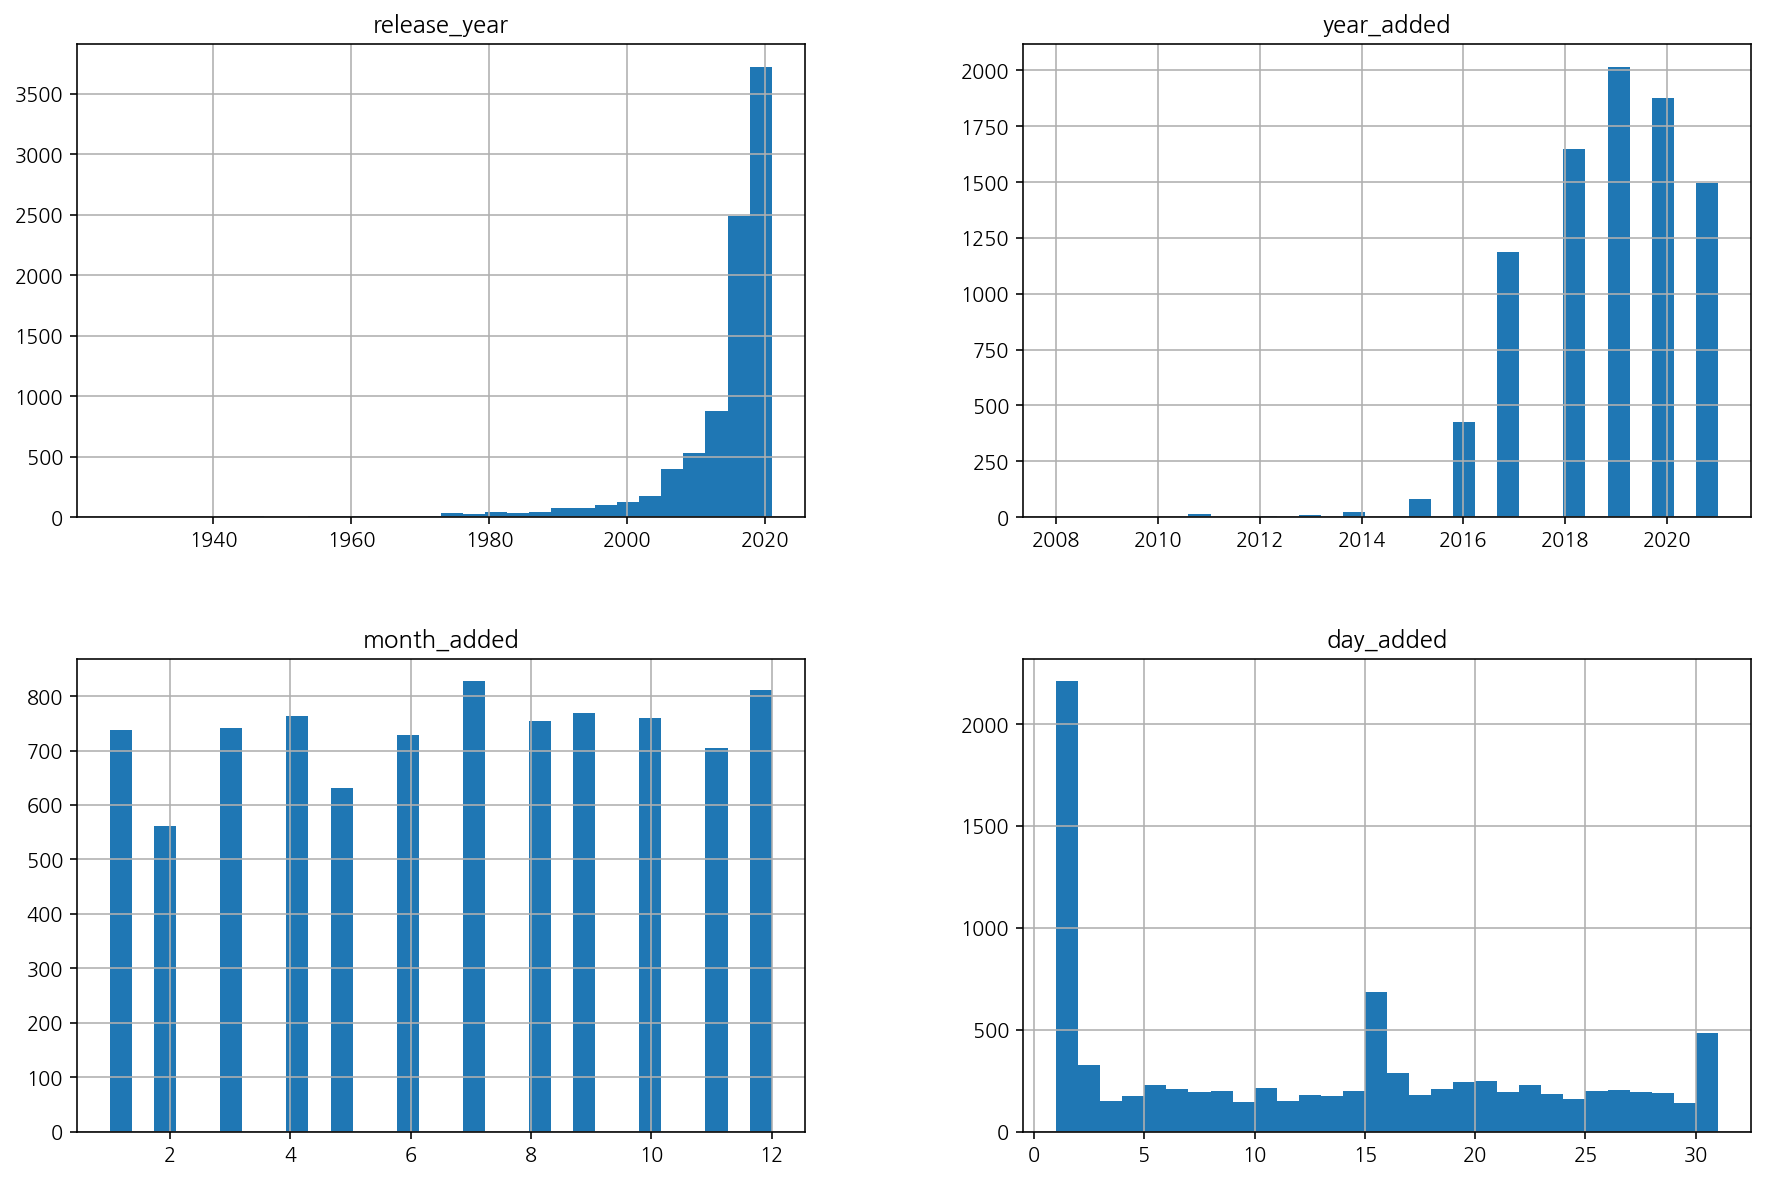

In [58]:
df.hist(bins=30, figsize=(15,10))

<AxesSubplot:xlabel='type', ylabel='count'>

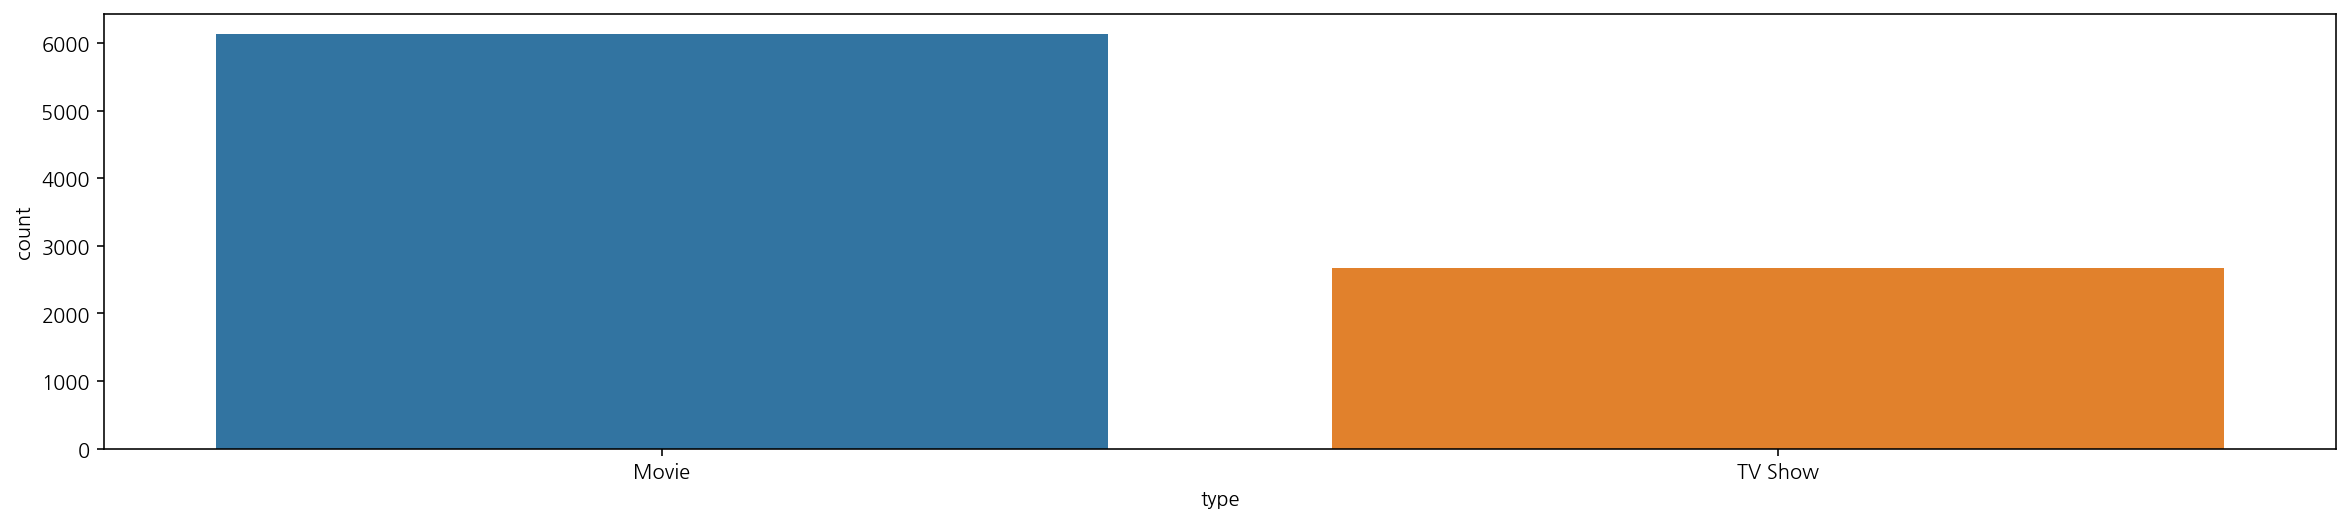

In [16]:
plt.figure(figsize=(20,4))
sns.countplot(data=df, x='type')

<AxesSubplot:xlabel='country', ylabel='count'>

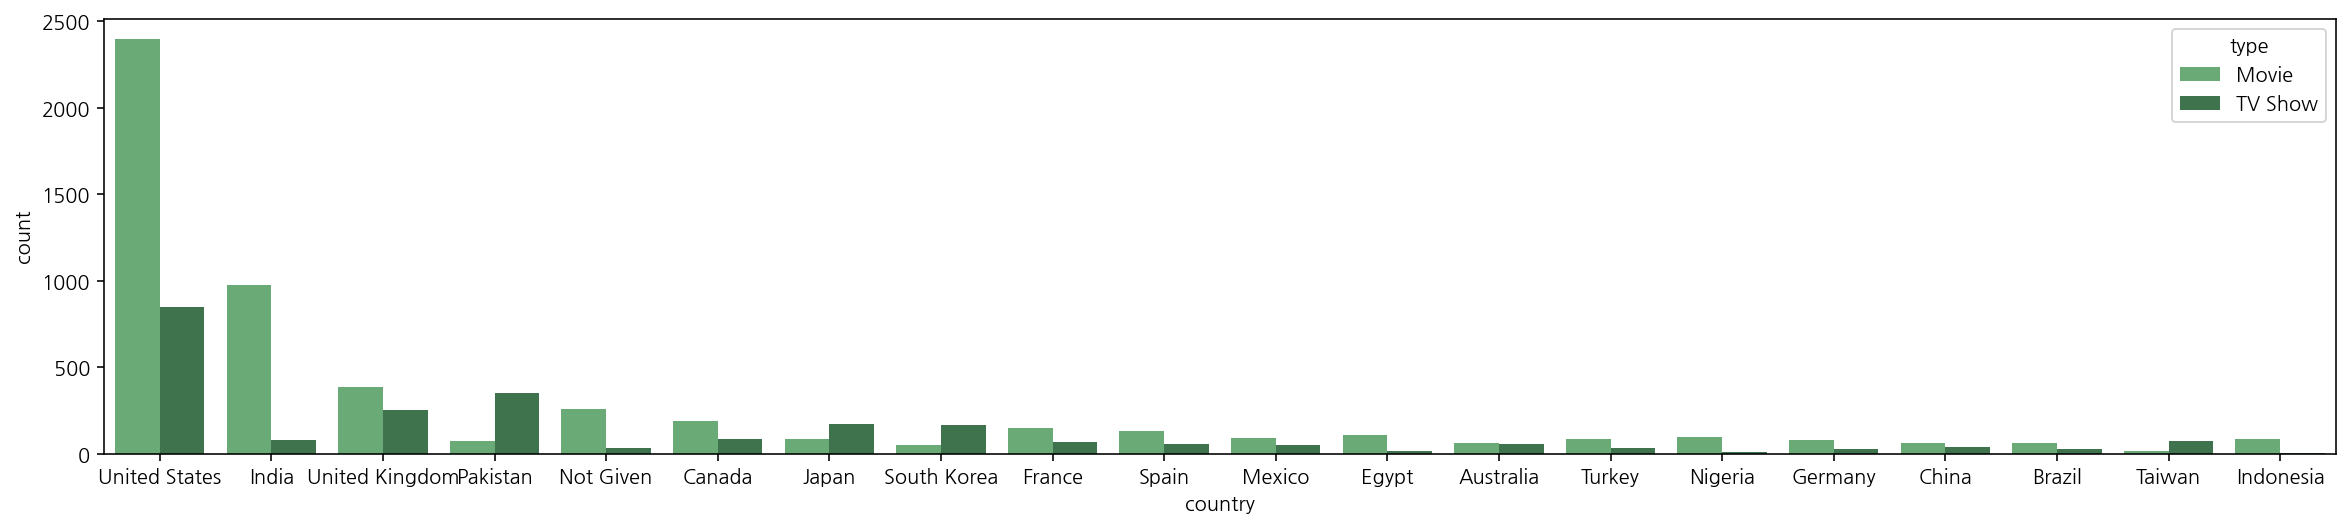

In [37]:
plt.figure(figsize=(20,4))
sns.countplot(data=df, x='country', hue='type', palette='Greens_d', order=df.country.value_counts().iloc[:20].index)

[Text(0, 0, 'Not Given'),
 Text(1, 0, 'Rajiv Chilaka'),
 Text(2, 0, 'Alastair Fothergill'),
 Text(3, 0, 'Raúl Campos, Jan Suter'),
 Text(4, 0, 'Suhas Kadav'),
 Text(5, 0, 'Marcus Raboy'),
 Text(6, 0, 'Jay Karas'),
 Text(7, 0, 'Cathy Garcia-Molina'),
 Text(8, 0, 'Martin Scorsese'),
 Text(9, 0, 'Youssef Chahine'),
 Text(10, 0, 'Jay Chapman'),
 Text(11, 0, 'Steven Spielberg'),
 Text(12, 0, 'Mark Thornton, Todd Kauffman'),
 Text(13, 0, 'Don Michael Paul'),
 Text(14, 0, 'David Dhawan'),
 Text(15, 0, 'Ryan Polito'),
 Text(16, 0, 'Johnnie To'),
 Text(17, 0, 'Lance Bangs'),
 Text(18, 0, 'Troy Miller'),
 Text(19, 0, 'Robert Rodriguez')]

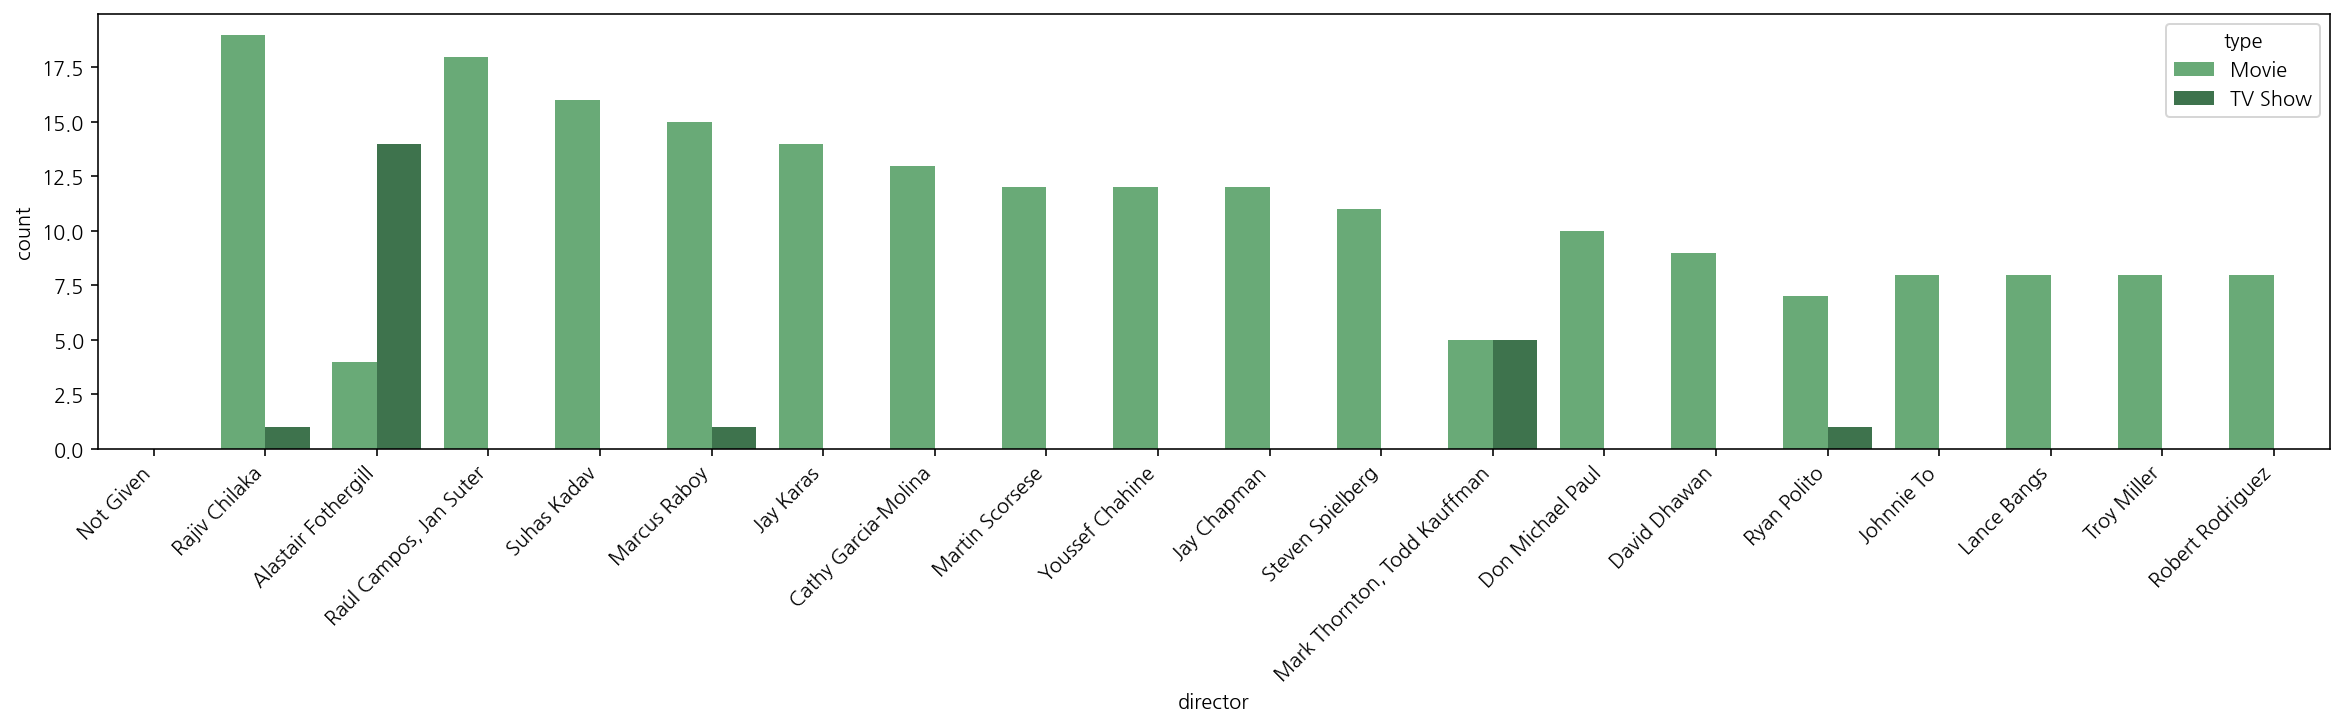

In [59]:
plt.figure(figsize=(20,4))
chart = sns.countplot(data=df[~(df.director == "Not Given")], x='director', hue='type', palette='Greens_d', order=df.director.value_counts().iloc[:20].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

<AxesSubplot:xlabel='rating', ylabel='count'>

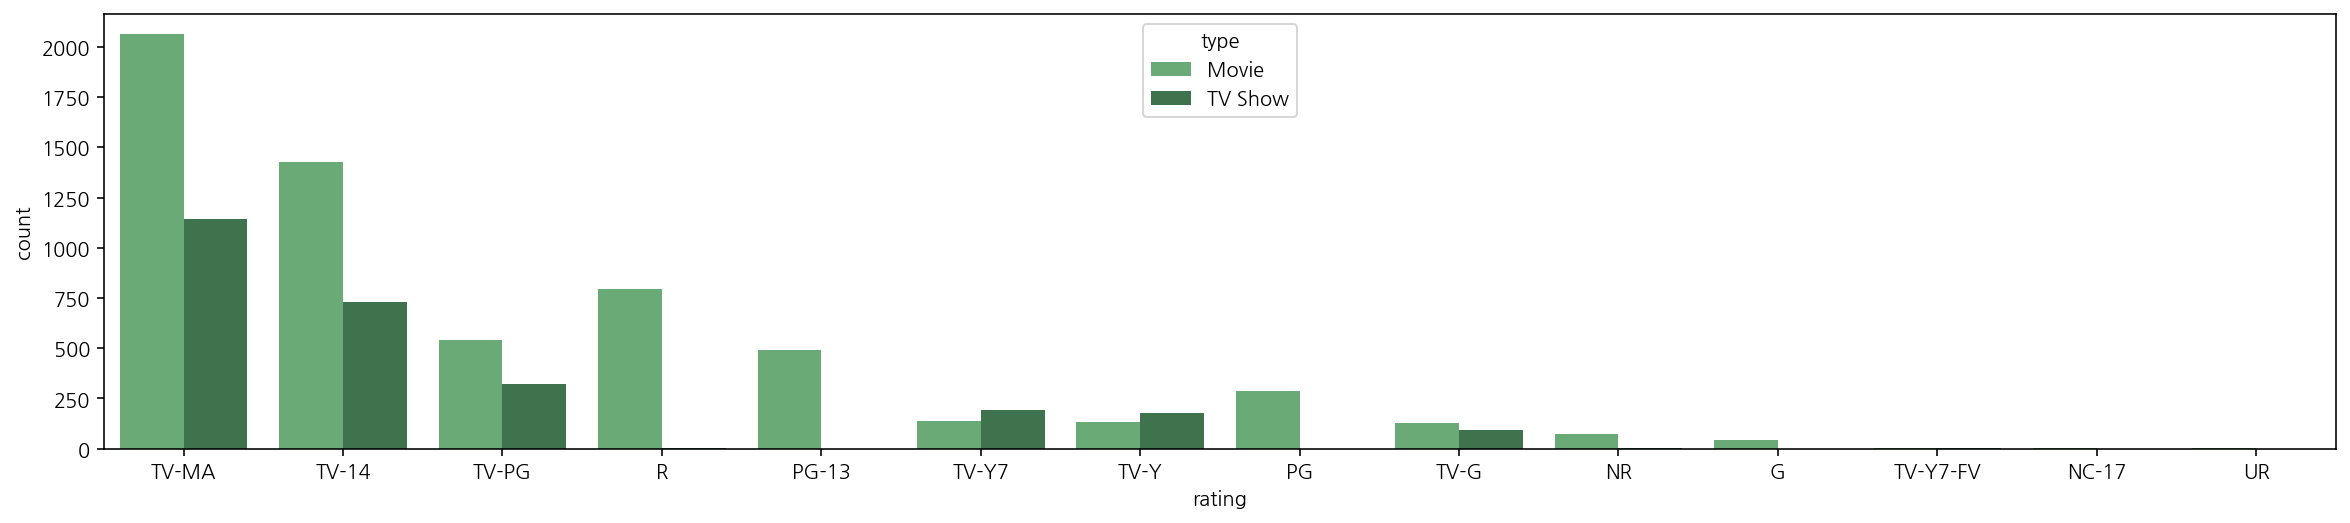

In [64]:
plt.figure(figsize=(20,4))
sns.countplot(data=df, x='rating', hue='type', palette='Greens_d', order=df.rating.value_counts().index)

[Text(0, 0, 'Dramas, International Movies'),
 Text(1, 0, 'Documentaries'),
 Text(2, 0, 'Stand-Up Comedy'),
 Text(3, 0, 'Comedies, Dramas, International Movies'),
 Text(4, 0, 'Dramas, Independent Movies, International Movies'),
 Text(5, 0, "Kids' TV"),
 Text(6, 0, 'Children & Family Movies'),
 Text(7, 0, 'Children & Family Movies, Comedies'),
 Text(8, 0, 'Documentaries, International Movies'),
 Text(9, 0, 'Dramas, International Movies, Romantic Movies'),
 Text(10, 0, 'Comedies, International Movies'),
 Text(11, 0, 'Comedies, International Movies, Romantic Movies'),
 Text(12, 0, 'Dramas'),
 Text(13, 0, 'Dramas, International Movies, Thrillers'),
 Text(14, 0, 'Action & Adventure, Dramas, International Movies'),
 Text(15, 0, 'Action & Adventure'),
 Text(16, 0, 'International TV Shows, TV Dramas'),
 Text(17, 0, 'Comedies, Dramas, Independent Movies'),
 Text(18, 0, 'Crime TV Shows, International TV Shows, TV Dramas'),
 Text(19, 0, 'Comedies')]

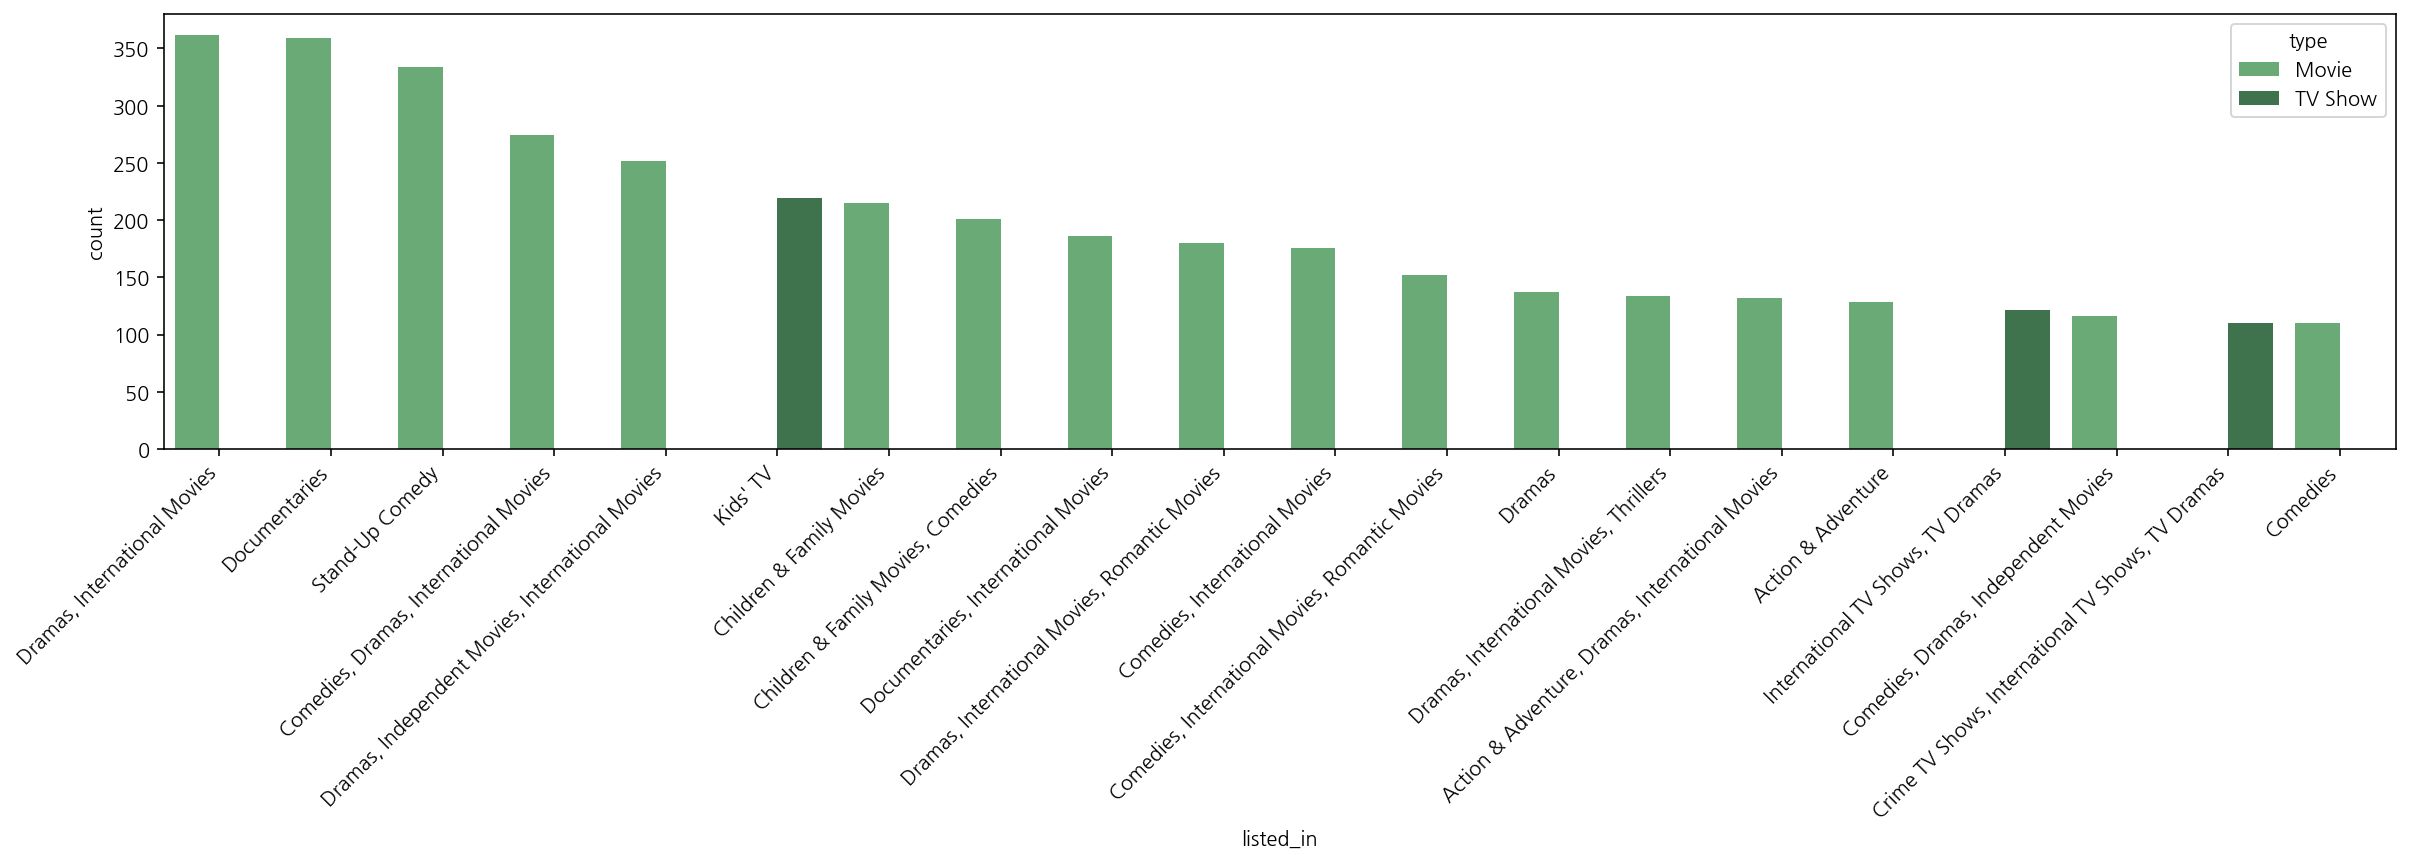

In [75]:
plt.figure(figsize=(20,4))
chart2 = sns.countplot(data=df, x='listed_in', hue='type', palette='Greens_d', order=df.listed_in.value_counts().iloc[:20].index)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, '1 Season'),
 Text(1, 0, '2 Seasons'),
 Text(2, 0, '3 Seasons'),
 Text(3, 0, '90 min'),
 Text(4, 0, '97 min'),
 Text(5, 0, '93 min'),
 Text(6, 0, '94 min'),
 Text(7, 0, '91 min'),
 Text(8, 0, '95 min'),
 Text(9, 0, '96 min'),
 Text(10, 0, '92 min'),
 Text(11, 0, '102 min'),
 Text(12, 0, '98 min'),
 Text(13, 0, '99 min'),
 Text(14, 0, '101 min'),
 Text(15, 0, '88 min'),
 Text(16, 0, '103 min'),
 Text(17, 0, '106 min'),
 Text(18, 0, '100 min'),
 Text(19, 0, '89 min')]

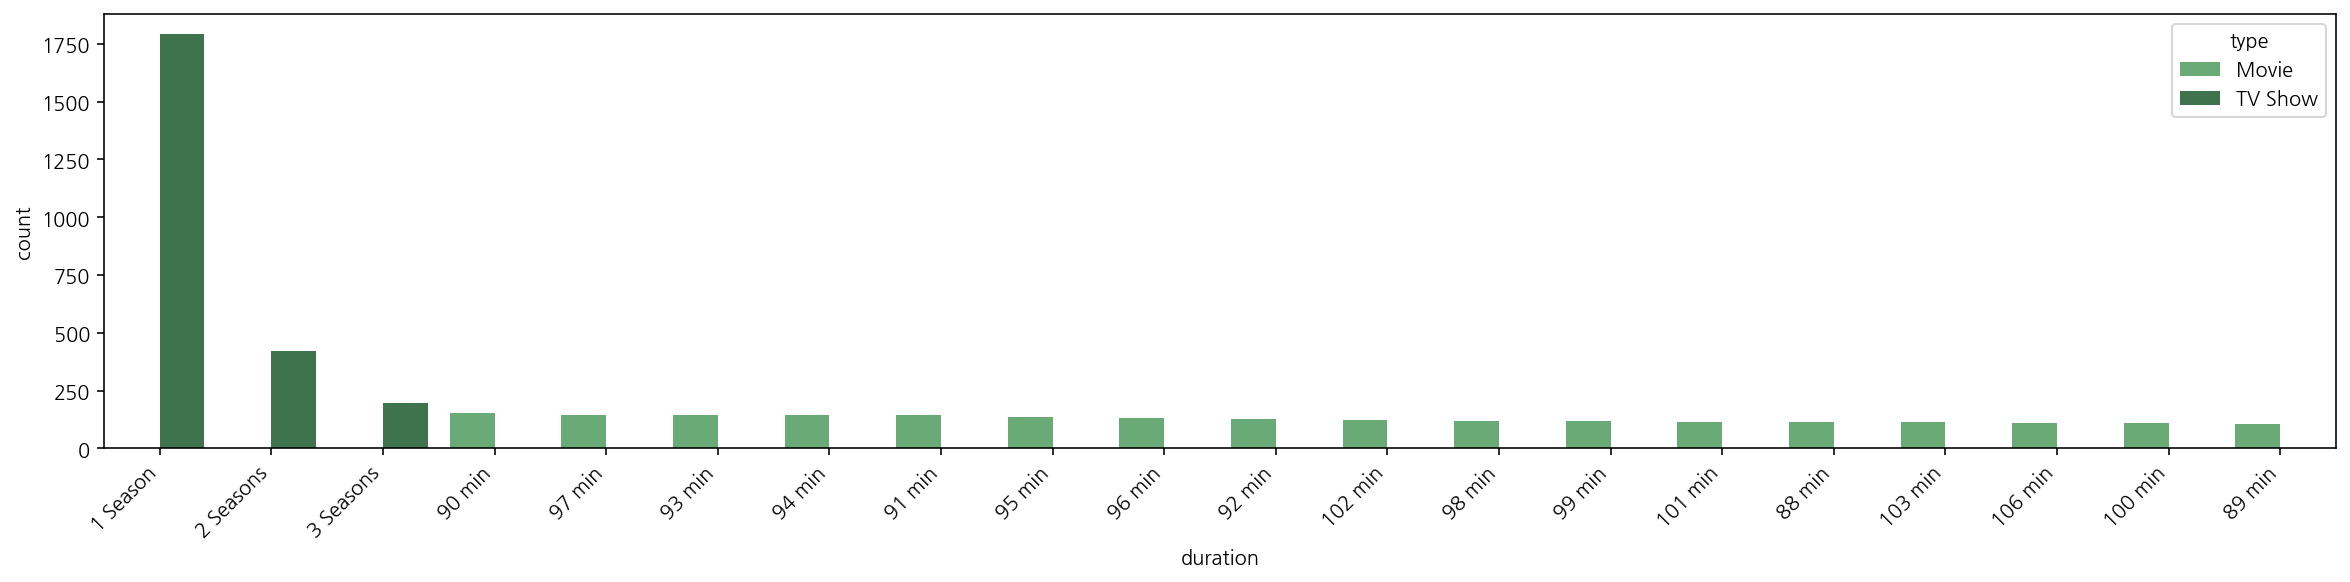

In [78]:
plt.figure(figsize=(20,4))
chart3 = sns.countplot(data=df, x='duration', hue='type', palette='Greens_d', order=df.duration.value_counts().iloc[:20].index)
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=45, horizontalalignment='right')